In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf

# Load your saved model
model = tf.keras.models.load_model('/content/resnet50_best_model.h5')

# Check model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,642,445 (94.00 MB)

 Trainable params: 9,986,059 (38.09 MB)

 Non-trainable params: 14,656,384 (55.91 MB)

 Optimizer params: 2 (12.00 B)

✅ Model loaded successfully!


Saving sp.jpg to sp.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🎯 Predicted Class Index: 10
📝 Predicted Class Name: Vegetable-Fruit


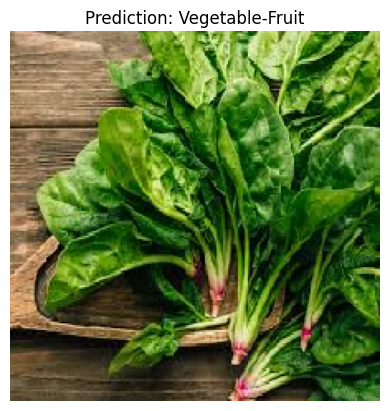

In [8]:
# ✅ Import libraries
from google.colab import files
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# ✅ Load the trained model
model = tf.keras.models.load_model('/content/resnet50_best_model.h5')
print("✅ Model loaded successfully!")

# ✅ Load class labels (JSON file should contain label mapping like {"apple": 0, "banana": 1, ...})
with open('/content/drive/MyDrive/class_indices.json', 'r') as f:
    class_indices = json.load(f)

# Reverse mapping {0: 'apple', 1: 'banana', ...}
class_labels = {v: k for k, v in class_indices.items()}

# ✅ Upload an image for prediction
uploaded = files.upload()

# ✅ Get the filename from the uploaded files
img_path = list(uploaded.keys())[0]

# ✅ Load and preprocess the image to match model input (224x224)
img = image.load_img(img_path, target_size=(224, 224))  # important fix
img_array = image.img_to_array(img) / 255.0             # normalize
img_array = np.expand_dims(img_array, axis=0)           # add batch dimension

# ✅ Get prediction from model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_label = class_labels.get(predicted_class, "Unknown")

# ✅ Print prediction result
print(f"🎯 Predicted Class Index: {predicted_class}")
print(f"📝 Predicted Class Name: {predicted_label}")

# ✅ Show image with prediction
plt.imshow(img)
plt.title(f"Prediction: {predicted_label}")
plt.axis('off')
plt.show()
